## Análise Geográfica do coronavirus

Com a notícia de que a Organização Mundial da Saúde declarou o novo surto de coronavírus uma emergência de saúde pública, aumentou o medo geral do público. Muitos países intensificaram suas medidas para combater esse vírus, com a condição na China ainda passiva. Mais de 20 países e territórios fora da China continental confirmaram casos do vírus - abrangendo Ásia, Europa, América do Norte e Oriente Médio. Leste - como Índia, Itália e Filipinas relataram seus primeiros casos.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
!pip install folium
import folium

In [2]:
# Lendo o dataset
data = pd.read_csv('2019_nCoV_data.csv')
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [3]:
# Veirificando as informações das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 8 columns):
Sno               1419 non-null int64
Date              1419 non-null object
Province/State    1045 non-null object
Country           1419 non-null object
Last Update       1419 non-null object
Confirmed         1419 non-null float64
Deaths            1419 non-null float64
Recovered         1419 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 88.8+ KB


In [4]:
# Converter a coluna Last Update no formato datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)

# Configurando a coluna Data para coluna do índice
# data.set_index ('Última atualização', local = True')
data.head()


,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


## Países afetados pelo coronavírus (2019-nCoV) até agora

In [5]:
# Países Afetados
countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal de Países afetados pelo virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']

Total de Países afetados pelo virus:  33


## Observe que a China e a China continental foram relatadas separadamente.

In [6]:
#Combinação de casos da China e da China continental

data['Country'].replace({'Mainland China':'China'},inplace=True)
countries = data['Country'].unique().tolist()
print(countries)
print("\nTotal de Países afetados pelo virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']

Total de Países afetados pelo virus:  32


## Status atual em todo o mundo

In [7]:
d = data['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

from datetime import date
data_latest = data[data['Date'] > pd.Timestamp(date(year,month,day))]
data_latest.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1345,2020-02-13 21:15:00,Hubei,China,2020-02-14 00:13:23,51986.0,1426.0,4131.0
1346,2020-02-13 21:15:00,Guangdong,China,2020-02-14 01:23:02,1261.0,2.0,332.0
1347,2020-02-13 21:15:00,Henan,China,2020-02-14 01:13:05,1184.0,11.0,313.0
1348,2020-02-13 21:15:00,Zhejiang,China,2020-02-14 01:13:05,1155.0,0.0,367.0
1349,2020-02-13 21:15:00,Hunan,China,2020-02-14 01:23:02,988.0,2.0,352.0


In [8]:
# Criando um quadro de dados com número total de casos confirmados para cada país
Number_of_countries = len(data_latest['Country'].value_counts())


cases = pd.DataFrame(data_latest.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed
1,Australia,15.0
2,Belgium,1.0
3,Cambodia,1.0
4,Canada,7.0
5,China,63841.0
6,Finland,1.0
7,France,11.0
8,Germany,16.0
9,Hong Kong,53.0
10,India,3.0


## Vamos criar um novo quadro de dados que consiste na latitude e longitude dos países sob observação

In [9]:
# Importando o conjunto de dados world_coordinates
world_coordinates = pd.read_csv('world-coordinates/world_coordinates.csv')

# Merging the coordinates dataframe with original dataframe
world_data = pd.merge(world_coordinates,global_cases,on='Country')
world_data.head()

,Code,Country,latitude,longitude,Confirmed
0,AE,United Arab Emirates,23.424076,53.847818,8.0
1,AU,Australia,-25.274398,133.775136,15.0
2,BE,Belgium,50.503887,4.469936,1.0
3,CA,Canada,56.130366,-106.346771,7.0
4,CN,China,35.861660,104.195397,63841.0


## Visualizando o Cenário Mundial Atual

In [10]:
# criar mapa e exibi-lo
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Confirmed'], world_data['Country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

In [11]:
# Um olhar sobre os diferentes casos - confirmados, morte e recuperação
print('Globally Confirmed Cases: ',data_latest['Confirmed'].sum())
print('Global Deaths: ',data_latest['Deaths'].sum())
print('Globally Recovered Cases: ',data_latest['Recovered'].sum())

Globally Confirmed Cases:  64422.0
Global Deaths:  1491.0
Globally Recovered Cases:  7064.0


In [12]:
# Vejamos as várias Províncias / Estados afetados
data_latest.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country   Province/State                                            
Australia New South Wales                     4.0     0.0        4.0
          Queensland                          5.0     0.0        0.0
          South Australia                     2.0     0.0        0.0
          Victoria                            4.0     0.0        4.0
Canada    British Columbia                    4.0     0.0        0.0
          London, ON                          1.0     0.0        1.0
          Toronto, ON                         2.0     0.0        0.0
China     Anhui                             934.0     6.0      166.0
          Beijing                           366.0     3.0       69.0
          Chongqing                         529.0     4.0      128.0
          Fujian                            281.0     0.0       59.0
          Gansu                              90.0     2.0       39.0
          Guangdong                        1261.0     2.0      332.0
          Guangxi                           226.0     2.0       35.0
          Guizhou                           140.0     1.0       28.0
          Hainan                            158.0     4.0       30.0
          Hebei                             283.0     3.0       69.0
          Heilongjiang                      418.0    11.0       37.0
          Henan                            1184.0    11.0      313.0
          Hubei                           51986.0  1426.0     4131.0
          Hunan                             988.0     2.0      352.0
          Inner Mongolia                     65.0     0.0        6.0
          Jiangsu                           593.0     0.0      137.0
          Jiangxi                           900.0     1.0      187.0
          Jilin                              86.0     1.0       25.0
          Liaoning                          117.0     1.0       22.0
          Ningxia                            67.0     0.0       24.0
          Qinghai                            18.0     0.0       11.0
          Shaanxi                           229.0     0.0       46.0
          Shandong                          519.0     2.0      111.0
          Shanghai                          318.0     1.0       62.0
          Shanxi                            126.0     0.0       36.0
          Sichuan                           463.0     1.0      105.0
          Tianjin                           119.0     3.0       21.0
          Tibet                               1.0     0.0        1.0
          Xinjiang                           65.0     1.0        6.0
          Yunnan                            156.0     0.0       27.0
          Zhejiang                         1155.0     0.0      367.0
Hong Kong Hong Kong                          53.0     1.0        1.0
Macau     Macau                              10.0     0.0        3.0
Others    Diamond Princess cruise ship      218.0     0.0        0.0
Taiwan    Taiwan                             18.0     0.0        1.0
US        Boston, MA                          1.0     0.0        0.0
          Chicago, IL                         2.0     0.0        2.0
          Los Angeles, CA                     1.0     0.0        0.0
          Madison, WI                         1.0     0.0        0.0
          Orange, CA                          1.0     0.0        0.0
          San Antonio, TX                     1.0     0.0        0.0
          San Benito, CA                      2.0     0.0        0.0
          San Diego County, CA                2.0     0.0        0.0
          Santa Clara, CA                     2.0     0.0        0.0
          Seattle, WA                         1.0     0.0        1.0
          Tempe, AZ                           1.0     0.0        0.0

In [13]:
# Províncias onde ocorreram mortes
data_latest.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
China          1488.0
Hong Kong         1.0
Philippines       1.0
Japan             1.0
Vietnam           0.0
Name: Deaths, dtype: float64

## Até agora, a maioria das mortes ocorreu na China e a maioria ocorreu somente em Hubei. Wuhan, o epicentro do vírus é a capital de Hubei


In [14]:
# Vamos também ver as estatísticas recuperadas
data_latest.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
China        6982.0
Singapore      15.0
Thailand       12.0
Japan           9.0
Australia       8.0
Name: Recovered, dtype: float64

## Um olhar mais atento às condições da China

In [15]:
# Mainland China
China = data_latest[data_latest['Country']=='China']
China

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1345,2020-02-13 21:15:00,Hubei,China,2020-02-14 00:13:23,51986.0,1426.0,4131.0
1346,2020-02-13 21:15:00,Guangdong,China,2020-02-14 01:23:02,1261.0,2.0,332.0
1347,2020-02-13 21:15:00,Henan,China,2020-02-14 01:13:05,1184.0,11.0,313.0
1348,2020-02-13 21:15:00,Zhejiang,China,2020-02-14 01:13:05,1155.0,0.0,367.0
1349,2020-02-13 21:15:00,Hunan,China,2020-02-14 01:23:02,988.0,2.0,352.0
1350,2020-02-13 21:15:00,Anhui,China,2020-02-14 01:33:02,934.0,6.0,166.0
1351,2020-02-13 21:15:00,Jiangxi,China,2020-02-14 01:13:06,900.0,1.0,187.0
1352,2020-02-13 21:15:00,Jiangsu,China,2020-02-14 01:03:10,593.0,0.0,137.0
1353,2020-02-13 21:15:00,Chongqing,China,2020-02-13 23:23:05,529.0,4.0,128.0
1354,2020-02-13 21:15:00,Shandong,China,2020-02-14 00:43:02,519.0,2.0,111.0


### Vejamos os números confirmados vs recuperados de províncias da China que não são de Hubei

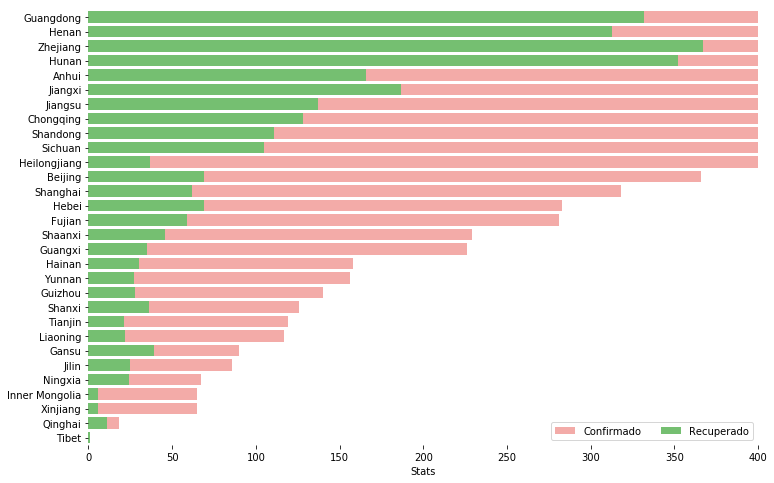

In [16]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
           label="Confirmado", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
           label="Recuperado", color="g")

# Adicionando uma legenda e um rótulo informativo sobre os eixos
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
      xlabel="Stats")
sns.despine(left=True, bottom=True)
